## 1. Reading and viewing the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Capstone_1_project/listings_summary.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [4]:
# To check shape
print("This dataset has {} rows and {} columns.".format(*df.shape))

# To Check duplicates
print("It contains {} duplicates.".format(df.duplicated().sum()))

This dataset has 22552 rows and 96 columns.
It contains 0 duplicates.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [7]:
df.index

RangeIndex(start=0, stop=22552, step=1)

## 2. Preprocessing the Data

Usually, fixed features of the property include the rooms/size/location etc. We also can decide on how we want to be listed: with a picture or not, how many minimum nights we want a guest to stay, whether we are instantly bookable, how we handle cancellations, etc. But we can neither be a "super host", nor do we have any reviews yet to show - although they can be very important for setting a price. So, let's focus only on features we can influence:

In [8]:
# keeping the columns that we will need

data_columns_needed= ['id', 'space', 'description', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy','host_is_superhost']

df_revised_columns = df[data_columns_needed].set_index('id')
df_revised_columns.head()

,space,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,price,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,host_is_superhost
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,t,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,...,$60.00,$30.00,$200.00,$28.00,1,4,f,f,strict_14_with_grace_period,t
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,t,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,...,$17.00,$0.00,$0.00,$0.00,1,2,f,f,flexible,f
3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,t,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,...,$90.00,$50.00,$200.00,$20.00,2,62,t,f,strict_14_with_grace_period,f
3309,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,t,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,...,$26.00,$30.00,$250.00,$18.00,1,5,f,f,strict_14_with_grace_period,f
7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,t,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,...,$42.00,$0.00,$0.00,$24.00,1,2,f,f,moderate,t


In [9]:
df_revised_columns.shape

(22552, 24)

In [10]:
# To check how many NaN's each column is having
df_revised_columns.isna().sum()

space                            8532
description                       203
host_has_profile_pic               26
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                          32
bedrooms                           18
bed_type                            0
amenities                           0
square_feet                     22106
price                               0
cleaning_fee                     7146
security_deposit                 9361
extra_people                        0
guests_included                     0
minimum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
host_is_superhost                  26
dtype: int64

We can look at different room types of what we are dealing with, since this maybe an important feature in detecting the price.

In [11]:
room_type = df['room_type'].value_counts(normalize=True)
room_type

Private room       0.511440
Entire home/apt    0.475435
Shared room        0.013125
Name: room_type, dtype: float64

Also, we would like to see how many property types are we up against and how many we are dealing with

In [12]:
property_type = df['property_type'].value_counts(normalize=True)
property_type

Apartment                 0.896816
Condominium               0.027137
Loft                      0.020397
House                     0.017648
Serviced apartment        0.007760
Hostel                    0.005676
Townhouse                 0.004390
Guest suite               0.003281
Bed and breakfast         0.002838
Guesthouse                0.002527
Hotel                     0.002217
Other                     0.002084
Boutique hotel            0.001907
Bungalow                  0.000887
Boat                      0.000754
Tiny house                0.000532
Camper/RV                 0.000488
Houseboat                 0.000488
Villa                     0.000443
Pension (South Korea)     0.000310
Aparthotel                0.000310
Cabin                     0.000266
Cottage                   0.000177
Resort                    0.000133
Train                     0.000089
Castle                    0.000089
Casa particular (Cuba)    0.000089
Island                    0.000044
Cave                

In [13]:
df_revised_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 2015 to 29867352
Data columns (total 24 columns):
space                           14020 non-null object
description                     22349 non-null object
host_has_profile_pic            22526 non-null object
neighbourhood_group_cleansed    22552 non-null object
latitude                        22552 non-null float64
longitude                       22552 non-null float64
property_type                   22552 non-null object
room_type                       22552 non-null object
accommodates                    22552 non-null int64
bathrooms                       22520 non-null float64
bedrooms                        22534 non-null float64
bed_type                        22552 non-null object
amenities                       22552 non-null object
square_feet                     446 non-null float64
price                           22552 non-null object
cleaning_fee                    15406 non-null object
security_deposit   

We can work on the numerical price columns to see if they will be use to us since they might be the feature we can work on in determining the price for those features. But first we have to view them and then cleaning the columns to change into float values

In [14]:
df_revised_columns[['price', 'cleaning_fee', 'security_deposit', 'extra_people']].head(2)

,price,cleaning_fee,security_deposit,extra_people
id,,,,
2015,$60.00,$30.00,$200.00,$28.00
2695,$17.00,$0.00,$0.00,$0.00


We will check if the price column has any missing values so that it can be useful to us

In [15]:
# checking for missing values/NaN's in price column

df_revised_columns['price'].isna().sum()

0

Similarly, we can check for other columns too for missing values

In [16]:
# checking for missing values/NaN's in cleaning fee column

df_revised_columns['cleaning_fee'].isna().sum()

7146

Looking at the number, we can probably assume that the owners/hosts do not charge for any cleaning fees. SO we can replace these NaN's with simply, 0's. Let's do that

In [17]:
df_revised_columns['cleaning_fee'].fillna('$0.00', inplace=True)

In [18]:
df_revised_columns['cleaning_fee'].isna().sum()

0

We will now check the security deposit column. If we see any NaN's , then we probably can assume the same thing that the owners do not charge anything extra for this.

In [19]:
df_revised_columns['security_deposit'].isna().sum()

9361

In [20]:
df_revised_columns['security_deposit'].fillna('$0.00', inplace=True)

In [21]:
df_revised_columns['security_deposit'].isna().sum()

0

In [22]:
df_revised_columns['extra_people'].isna().sum()

0

Since I have now removed any missing values or replaced them with 0's, it can be now converted from string to float(numerical) values, since it was originally an object.

In [23]:
# cleaning columns by method chaining

df_revised_columns['security_deposit'] = df_revised_columns['security_deposit'].str.replace('$','').str.replace(',', '').astype('float')
df_revised_columns['extra_people'] = df_revised_columns['extra_people'].str.replace('$','').str.replace(',', '').astype('float')
df_revised_columns['cleaning_fee'] = df_revised_columns['cleaning_fee'].str.replace('$','').str.replace(',', '').astype('float')
df_revised_columns['price'] = df_revised_columns['price'].str.replace('$','').str.replace(',', '').astype('float')

In [24]:
df_revised_columns[['price', 'cleaning_fee', 'security_deposit', 'extra_people']].head(2)

,price,cleaning_fee,security_deposit,extra_people
id,,,,
2015,60.0,30.0,200.0,28.0
2695,17.0,0.0,0.0,0.0


In [25]:
df_revised_columns['price'].value_counts()

30.0     1387
35.0     1256
50.0     1247
40.0     1191
25.0     1121
         ... 
268.0       1
375.0       1
188.0       1
228.0       1
263.0       1
Name: price, Length: 295, dtype: int64

In [26]:
df_revised_columns['Total_price'] = df_revised_columns[['price','cleaning_fee','security_deposit', 'extra_people']].sum(axis=1)
df_revised_columns.head(2)

,space,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,cleaning_fee,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,host_is_superhost,Total_price
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,t,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,...,30.0,200.0,28.0,1,4,f,f,strict_14_with_grace_period,t,318.0
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,t,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,...,0.0,0.0,0.0,1,2,f,f,flexible,f,17.0


In [27]:
avg_price_roomtype= df_revised_columns.groupby(['room_type'])['price'].agg(np.mean)

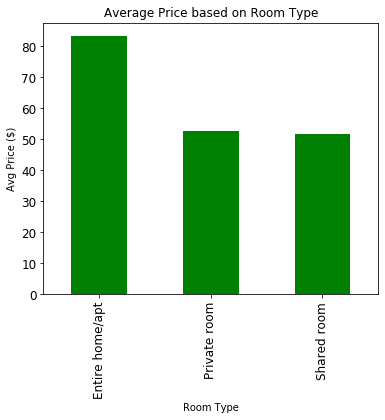

In [28]:
# Plotting the average price by room type

avg_price_roomtype.plot(kind='bar', color='green', figsize = (6,5), fontsize = 12)
plt.title('Average Price based on Room Type')
plt.xlabel('Room Type')
plt.ylabel('Avg Price ($)')
plt.show()

From the above graph, it is evident that the **Entire home/apt** has the highest average price. So we can consider this for taking into our model later.

In [29]:
# Using get dummies method to extract the three room types into seperate columns for our model

df_revised_columns = pd.get_dummies(df_revised_columns, columns=['room_type'])
df_revised_columns.rename(columns={'room_type_Entire home/apt': 'Entire home/apt' , 'room_type_Private room': 'Private room' ,  'room_type_Shared room' : 'Shared room'}, inplace=True)
df_revised_columns.head(2)

,space,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,...,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,host_is_superhost,Total_price,Entire home/apt,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,t,Mitte,52.534537,13.402557,Guesthouse,3,1.0,1.0,...,1,4,f,f,strict_14_with_grace_period,t,318.0,1,0,0
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,t,Pankow,52.548513,13.404553,Apartment,2,1.0,1.0,...,1,2,f,f,flexible,f,17.0,0,1,0


Let us investigate the *price* column since this will be our main target feature later on

In [30]:
df_revised_columns['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

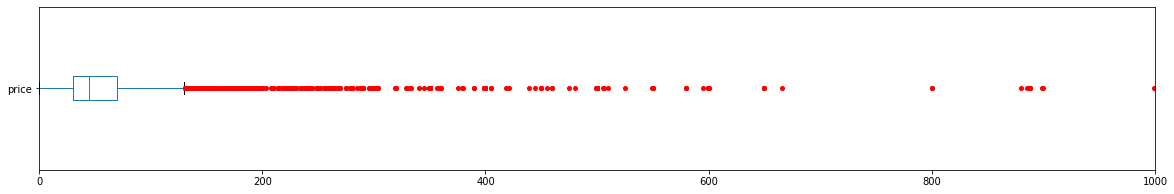

In [31]:
flierprops = dict(marker='.', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='r')
df_revised_columns['price'].plot(kind='box', xlim = (0 , 1000), vert=False, figsize = (20,3) , flierprops = flierprops )

From the above boxplot, it is quite evident that 75% of the prices are less than €70 and the mean price is around €67 . But the maximum price showing here is €9000. Also, there are many outliers which seems to fade slowly after €400. Also, there are prices set to zero, which is odd. So we can drop all the outliers after 400 and also which are set to 0.

In [32]:
df_revised_columns.drop(df_revised_columns[(df_revised_columns['price'] > 400) | (df_revised_columns['price'] == 0)].index, axis=0, inplace=True)

In [33]:
df_revised_columns['price'].describe()

count    22441.000000
mean        57.584377
std         42.162006
min          1.000000
25%         30.000000
50%         45.000000
75%         70.000000
max        400.000000
Name: price, dtype: float64

Check for the missing values

In [34]:
df_revised_columns.isna().sum()

space                            8503
description                       202
host_has_profile_pic               25
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
accommodates                        0
bathrooms                          32
bedrooms                           18
bed_type                            0
amenities                           0
square_feet                     21996
price                               0
cleaning_fee                        0
security_deposit                    0
extra_people                        0
guests_included                     0
minimum_nights                      0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
host_is_superhost                  25
Total_price                         0
Entire home/apt                     0
Private room                        0
Shared room 

We can try to set price ranges on how the listings have been setting the prices. It will be a useful visualization to see.

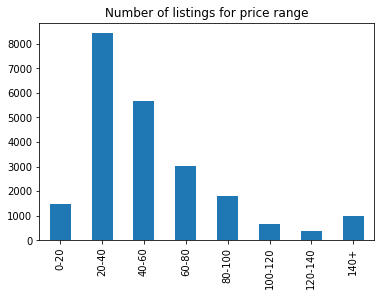

In [35]:
# Creating price range column
price_range = pd.cut(df_revised_columns['price'], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, df_revised_columns["price"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
df_revised_columns['price_range'] = price_range 
df_revised_columns['price_range'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of listings for price range')
plt.show()

In [36]:
df_revised_columns['bed_type'].value_counts()

Real Bed         21659
Pull-out Sofa      449
Futon              240
Couch               70
Airbed              23
Name: bed_type, dtype: int64

Since almost 90% of beds are Real bed, this may not have much significant impact on price.

## Host impact

In [37]:
df_revised_columns.host_is_superhost.unique()

array(['t', 'f', nan], dtype=object)

In [38]:
df_revised_columns.host_has_profile_pic.unique()

array(['t', 'f', nan], dtype=object)

In [39]:
avg_price_hostissuperhost= df_revised_columns.groupby(['host_is_superhost'])['price'].agg(np.mean)
avg_price_hostissuperhost

host_is_superhost
f    56.488907
t    64.804617
Name: price, dtype: float64

In [40]:
df_revised_columns['host_is_superhost'].isna().sum()

25

In [41]:
df_revised_columns['host_has_profile_pic'].isna().sum()

25

In [42]:
# replace host_has_profile_pic Nan's with no/false

df_revised_columns['host_has_profile_pic'].fillna(value='f', inplace=True)
df_revised_columns['host_has_profile_pic'].unique()

array(['t', 'f'], dtype=object)

In [43]:
# replace host_is_superhost Nan's with same as above with no/false

df_revised_columns['host_is_superhost'].fillna(value='f', inplace=True)
df_revised_columns['host_is_superhost'].unique()

array(['t', 'f'], dtype=object)

In [44]:
df_revised_columns['host_is_superhost'] = df_revised_columns['host_is_superhost'].map({'t':1, 'f':0})

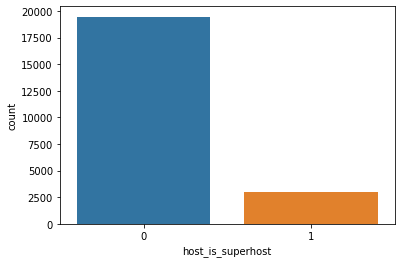

In [45]:
sns.countplot(x='host_is_superhost', data = df_revised_columns)

In [46]:
df_revised_columns['host_has_profile_pic'] = df_revised_columns['host_has_profile_pic'].map({'t':1, 'f':0})

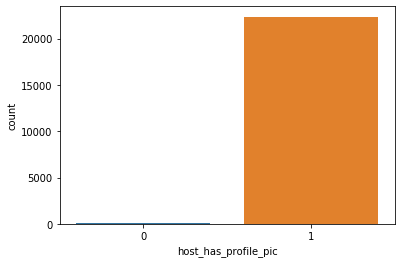

In [47]:
sns.countplot(x='host_has_profile_pic', data = df_revised_columns)

We are yet to make sure that the above two columns have any significance on average pricing in the neighbourhood. 

### Amenities being offered

We can check the different amenities being offered by a host and whether that contributes anything significant in determining the price, and if it makes a property more valuable.

In [48]:
# Introducing a counter to count different amenities produced by the host

from collections import Counter

In [49]:
results = Counter()
df_revised_columns['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

most_common_amenities= results.most_common(30)
most_common_amenities

[('Wifi', 21413),
 ('Kitchen', 21255),
 ('Heating', 21111),
 ('Essentials', 20236),
 ('Washer', 18428),
 ('Hair dryer', 14811),
 ('Laptop friendly workspace', 14387),
 ('Hangers', 13832),
 ('Iron', 11134),
 ('Shampoo', 10586),
 ('TV', 10051),
 ('Hot water', 9684),
 ('Family/kid friendly', 8099),
 ('Internet', 7881),
 ('Host greets you', 6639),
 ('Smoke detector', 6404),
 ('Buzzer/wireless intercom', 6099),
 ('Lock on bedroom door', 5265),
 ('Refrigerator', 5183),
 ('Free street parking', 5174),
 ('Dishes and silverware', 5056),
 ('Cooking basics', 4808),
 ('Elevator', 4807),
 ('Bed linens', 4803),
 ('Stove', 4791),
 ('Smoking allowed', 4572),
 ('Oven', 4287),
 ('translation missing: en.hosting_amenity_50', 4174),
 ('First aid kit', 3973),
 ('Cable TV', 3697)]

In [50]:
# creating a new df called amenities_df

amenities_df = pd.DataFrame(most_common_amenities, columns = ['amenity', 'amenity_count']).sort_values(by=['amenity_count'], ascending=True)

In [51]:
amenities_df.head()

,amenity,amenity_count
29,Cable TV,3697
28,First aid kit,3973
27,translation missing: en.hosting_amenity_50,4174
26,Oven,4287
25,Smoking allowed,4572


Text(0.5, 0, 'count')

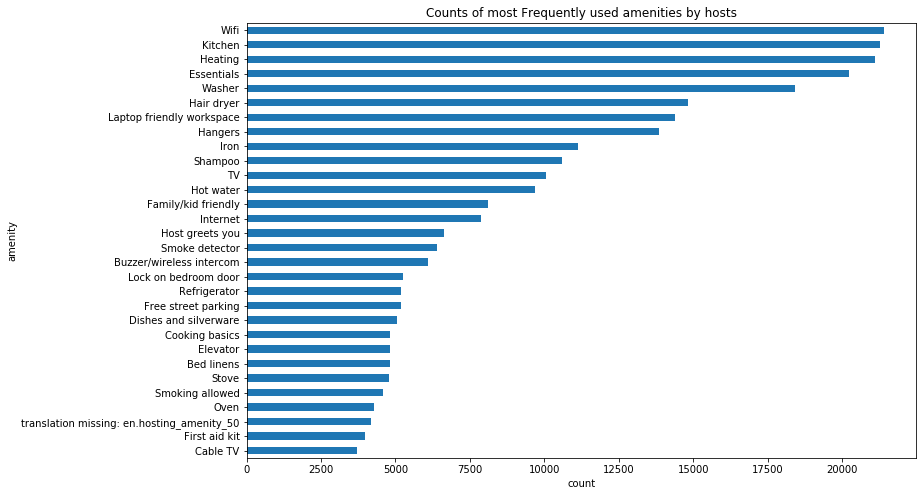

In [52]:
amenities_df.plot(x='amenity', y='amenity_count', kind='barh', figsize = (12,8), legend=False, title= 'Counts of most Frequently used amenities by hosts')
plt.xlabel('count')

In [53]:
amenities_df.describe()

,amenity_count
count,30.000000
mean,9421.333333
std,5948.120714
min,3697.000000
25%,4807.250000
50%,6521.500000
75%,13157.500000
max,21413.000000


Let us add columns to the revised df on which amenities might be provided by unique hosts and not provided by all hosts, which might have some significance on the price ratings. 

* Laptop Friendly workspace
* TV
* Family/Kid Friendly
* Host greets you
* Smoking allowed

In [54]:
df_revised_columns['Laptop_friendly_workspace'] = df_revised_columns['amenities'].str.contains('Laptop Friendly workspace')
df_revised_columns['TV'] = df_revised_columns['amenities'].str.contains('TV')
df_revised_columns['Family_kid_friendly'] = df_revised_columns['amenities'].str.contains('Family/Kid Friendly')
df_revised_columns['Host_greets_you'] = df_revised_columns['amenities'].str.contains('Host greets you')
df_revised_columns['Smoking_is_allowed'] = df_revised_columns['amenities'].str.contains('Smoking allowed')

In [55]:
df_revised_columns.drop(['bed_type'] , axis=1, inplace=True)

### Distance to Berlin Center

Distance/Location is also an important factor in determining the price. Calculating each accommodation's distance to the so-called centroid of Berlin is simple rather than just relying on the neighbourhoods or areas.

In [56]:
# classgeopy.distance.great_circle(*args, **kwargs). Using spherical geometry to calculate the surface distance between two points.

from geopy.distance import great_circle

In [57]:
def distance_to_mid_center(lat, lon):
    berlin_center = (52.5200, 13.4050)
    accommodation = (lat, lon)
    return great_circle(berlin_center, accommodation).km

In [58]:
df_revised_columns['distance_to_midcenter'] = df_revised_columns.apply(lambda x: distance_to_mid_center(x.latitude, x.longitude), axis=1)

In [59]:
df_revised_columns.head(2)

,space,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,...,Entire home/apt,Private room,Shared room,price_range,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_is_allowed,distance_to_midcenter
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,1,Mitte,52.534537,13.402557,Guesthouse,3,1.0,1.0,...,1,0,0,40-60,False,True,False,False,False,1.624906
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,1,Pankow,52.548513,13.404553,Apartment,2,1.0,1.0,...,0,1,0,0-20,False,False,False,False,False,3.170627


In [60]:
df_revised_columns.columns

Index(['space', 'description', 'host_has_profile_pic',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'accommodates', 'bathrooms', 'bedrooms', 'amenities',
       'square_feet', 'price', 'cleaning_fee', 'security_deposit',
       'extra_people', 'guests_included', 'minimum_nights', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy', 'host_is_superhost',
       'Total_price', 'Entire home/apt', 'Private room', 'Shared room',
       'price_range', 'Laptop_friendly_workspace', 'TV', 'Family_kid_friendly',
       'Host_greets_you', 'Smoking_is_allowed', 'distance_to_midcenter'],
      dtype='object')

In [61]:
df_revised_columns['square_feet'].isna().sum()

21996

### Estimating the Size

Size can be one of the important factors in determining the price. As we can see above, 95% of the square_feet column was filled with NaN's. But we can check the description column if we can extract any information from it regarding the size.

In [62]:
df_revised_columns[['description']].head(2)

,description
id,
2015,Great location! 30 of 75 sq meters. This wood...
2695,In the summertime we are spending most of our ...


In [63]:
df_revised_columns['size'] = df_revised_columns['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df_revised_columns['size'] = df_revised_columns['size'].str.replace("\D", "")

# change datatype of size into float

df_revised_columns['size'] = df_revised_columns['size'].astype(float)

In [64]:
df_revised_columns[['description', 'size']].head(8)

,description,size
id,,
2015,Great location! 30 of 75 sq meters. This wood...,75.0
2695,In the summertime we are spending most of our ...,25.0
3176,This beautiful first floor apartment is situa...,68.0
3309,First of all: I prefer short-notice bookings. ...,26.0
7071,Cozy and large room in the beautiful district ...,20.0
9991,4 bedroom with very large windows and outstand...,780.0
14325,The apartment is located on the upper second f...,NaN
16401,Hello future guests! We want to rent our cute ...,55.0


In [65]:
df_revised_columns['size'].isna().sum()

11744

In [66]:
df_revised_columns['price']

id
2015        60.0
2695        17.0
3176        90.0
3309        26.0
7071        42.0
            ... 
29856708    60.0
29857108    20.0
29864272    85.0
29866805    99.0
29867352    45.0
Name: price, Length: 22441, dtype: float64

### Neighbourhood Statistics

In [67]:
df_revised_columns['neighbourhood_group_cleansed'].describe()

count                        22441
unique                          12
top       Friedrichshain-Kreuzberg
freq                          5479
Name: neighbourhood_group_cleansed, dtype: object

In [68]:
# We would like to measure the popularity of average prices for each berlin neighbourhood just for our analysis

neighbourhood_group = pd.DataFrame(df_revised_columns["neighbourhood_group_cleansed"].value_counts())
# Taking the avg price of the neighbourhood cleansed column
neighbourhood_avgprice = df_revised_columns.groupby('neighbourhood_group_cleansed')['price'].agg(np.mean)
neighbourhood_avgprice_df = pd.DataFrame(neighbourhood_avgprice)

# Merge the two dataframes to create a final df
neighbourhood_info = pd.merge(neighbourhood_group, neighbourhood_avgprice_df, how='inner', left_index=True, right_index=True)
neighbourhood_info.reset_index(inplace=True)

# Setting the column names
neighbourhood_info.columns = ['neighbourhood', 'properties_count', 'avg_price']
neighbourhood_info = neighbourhood_info.sort_values(by='properties_count', ascending=False)
neighbourhood_info

,neighbourhood,properties_count,avg_price
0,Friedrichshain-Kreuzberg,5479,57.796861
1,Mitte,4596,63.573760
2,Pankow,3529,62.604704
3,Neukölln,3496,46.192792
4,Charlottenburg-Wilm.,1570,63.321656
5,Tempelhof - Schöneberg,1545,56.607767
6,Lichtenberg,685,47.719708
7,Treptow - Köpenick,595,52.216807
8,Steglitz - Zehlendorf,436,55.309633
9,Reinickendorf,246,44.882114


### Price differences by Neighbourhood

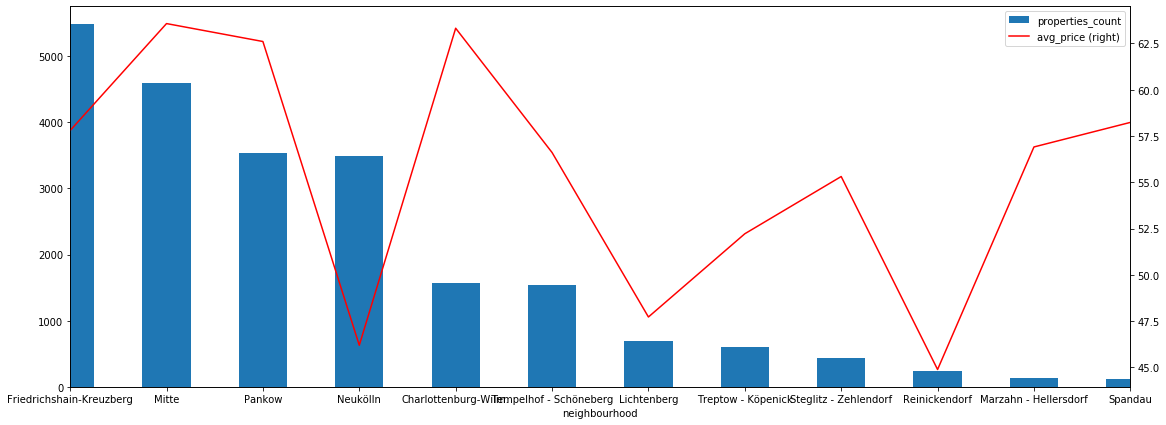

In [78]:
# Plot the above dataframe for better understanding

neighbourhood_plot = neighbourhood_info.plot(kind = 'bar', x = 'neighbourhood', y='properties_count', figsize=(19,7))
neighbourhood_info.plot(x = 'neighbourhood', y='avg_price', ax= neighbourhood_plot, secondary_y= True, color='r')

### Accommodates

In [82]:
df_revised_columns['accommodates'].describe()

count    22441.000000
mean         2.625195
std          1.471029
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: accommodates, dtype: float64

Text(0, 0.5, 'count')

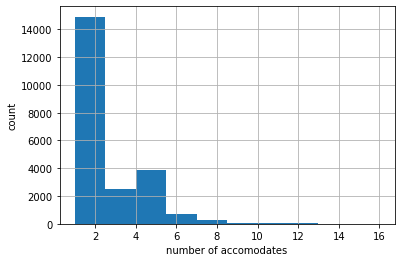

In [84]:
df_revised_columns['accommodates'].hist()
plt.xlabel('number of accomodates')
plt.ylabel('count')

In [87]:
from scipy import stats

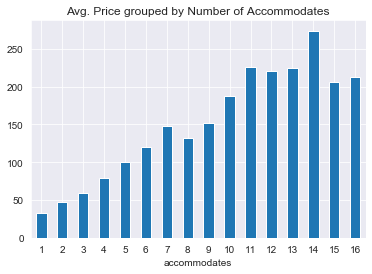

The pearson correlation coefficient between the number of accommodates and price is  0.5745 with a p-value of  0.0000.


In [98]:
# Let's check the avg price grouped with number of accommodates and calculate pearson value

sns.set_style('darkgrid')
df_revised_columns.groupby("accommodates")["price"].agg(np.mean).plot(kind="bar", rot=0)
plt.title("Avg. Price grouped by Number of Accommodates")
plt.show()
print("The pearson correlation coefficient between the number of accommodates and price is {0[0]: .4f} with a p-value of {0[1]: .4f}.".format(stats.pearsonr(df_revised_columns['accommodates'], df_revised_columns['price'])))

From the above, it seems like accommodates and price seems to be highly correlated.

In [103]:
# we dropped space and amenities columns from the revised dataframe

df_revised_columns.head(2)

,description,host_has_profile_pic,neighbourhood_group_cleansed,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,square_feet,...,Private room,Shared room,price_range,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_is_allowed,distance_to_midcenter,size
id,,,,,,,,,,,,,,,,,,,,,
2015,Great location! 30 of 75 sq meters. This wood...,1,Mitte,52.534537,13.402557,Guesthouse,3,1.0,1.0,NaN,...,0,0,40-60,False,True,False,False,False,1.624906,75.0
2695,In the summertime we are spending most of our ...,1,Pankow,52.548513,13.404553,Apartment,2,1.0,1.0,NaN,...,1,0,0-20,False,False,False,False,False,3.170627,25.0


In [104]:
df_revised_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22441 entries, 2015 to 29867352
Data columns (total 32 columns):
description                     22239 non-null object
host_has_profile_pic            22441 non-null int64
neighbourhood_group_cleansed    22441 non-null object
latitude                        22441 non-null float64
longitude                       22441 non-null float64
property_type                   22441 non-null object
accommodates                    22441 non-null int64
bathrooms                       22409 non-null float64
bedrooms                        22423 non-null float64
square_feet                     445 non-null float64
price                           22441 non-null float64
cleaning_fee                    22441 non-null float64
security_deposit                22441 non-null float64
extra_people                    22441 non-null float64
guests_included                 22441 non-null int64
minimum_nights                  22441 non-null int64
instant_bookable  

In [ ]:
# remember to deal with columns instant bookable and cancellation policy, change them from category to numerical

## Exploratory Data Analysis